<a href="https://colab.research.google.com/github/brothersanta/UT-AI/blob/main/DataAnalysis_FoodCustomerBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# get rows and columns present in the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns")

There are 1898 rows and 9 columns


#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
#### The following columns have an Integer datatype: Order ID, Customer ID, Food Preparation Time, and Delivery Time
#### The following columns contain text strings and have an Object datatype: Restaurant Name, Cuisine Type, Day of the Week, Rating
#### The following column has a Float data type because it has a numerical value with a decimal point: Cost of the Order
### We observe that 'Rating' is an object but it might enable better analysis if it were converted to a number

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing data using isnull
print(df.isnull().sum())
# Check for missing data in 'rating'
print(df['rating'].unique())
# Quantify Not Given within 'rating'
dfrating=df.groupby('rating').count()
print(dfrating)
Notgiven=df['rating'].value_counts()['Not given']
percentage=100*Notgiven/df.shape[0]

print("Percentage of Rating that is not given:",percentage)

# Check for zero values within 'cost of order'
dfcost=df.groupby('cost_of_the_order').count()
print(dfcost)
# Check for zero values within 'food_preparation_time'
dfpreptime=df.groupby('food_preparation_time').count()
print(dfpreptime)
# Check for zero values within 'delivery_time'
dfdeltime=df.groupby('delivery_time').count()
print(dfdeltime)
# Replace "Not given" values in 'Ratings' with "nan"
df['rating'] = df['rating'].replace(['Not given'], np.nan).astype('Int64')
df.info()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
['Not given' '5' '3' '4']
           order_id  customer_id  restaurant_name  cuisine_type  \
rating                                                            
3               188          188              188           188   
4               386          386              386           386   
5               588          588              588           588   
Not given       736          736              736           736   

           cost_of_the_order  day_of_the_week  food_preparation_time  \
rating                                                                 
3                        188              188                    188   
4                        386              386                    386   
5                        58

#### Observations: there is no missing data for any Columns except for rating, which had "Not given"
#### "Not given" was changed to "nan" to enable Rating to be calculated as an integer


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the statistical summary of the data
df['food_preparation_time'].describe()

# to transpose the table do
# df.describe().T['mean']
# or
# df.describe().loc['mean']
# or if you just want the mean for cost of order: df['cost_of_the_order'].mean()
# or ound(df.describe().loc['mean'],3)

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations: the minimum food preparation time is 20 min; the average food preparation time is 27.37 min; the maximum time food preparation time is 35 min


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Check for missing data using isnull
df.isnull().sum()
print(Notgiven)


736


#### Observations: 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

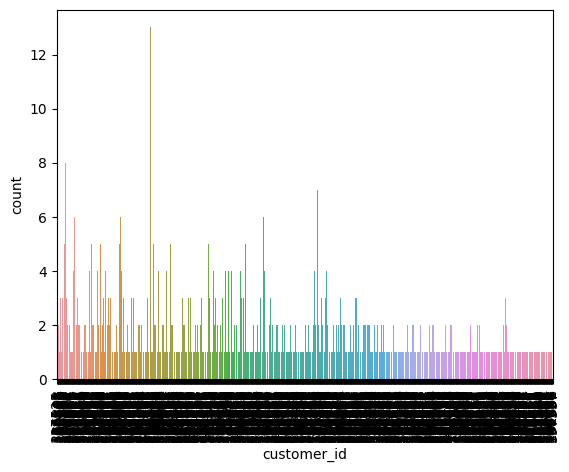

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


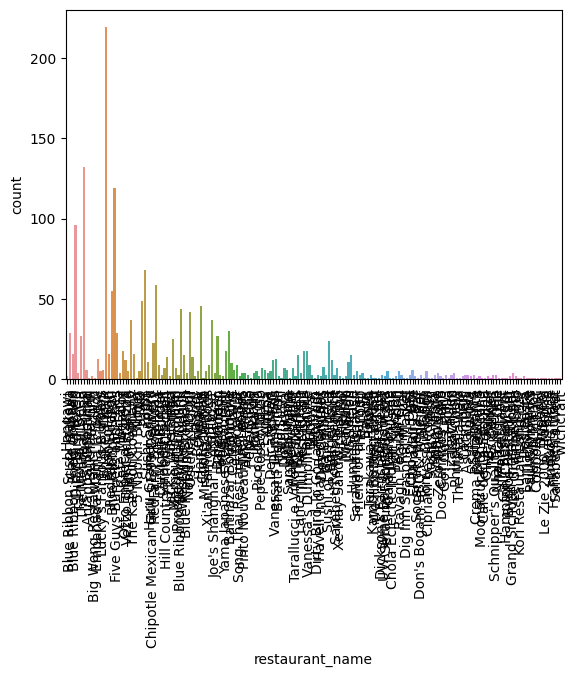

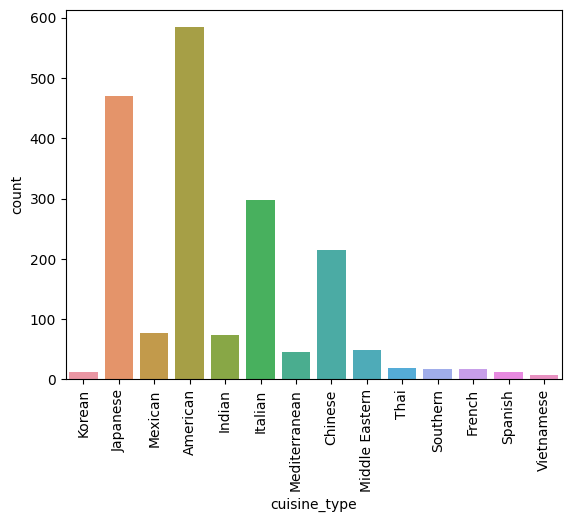

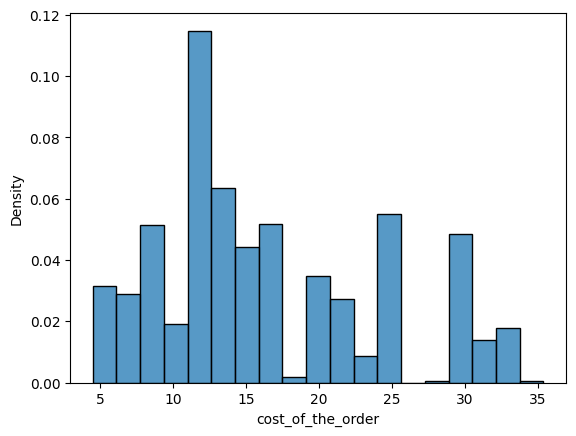

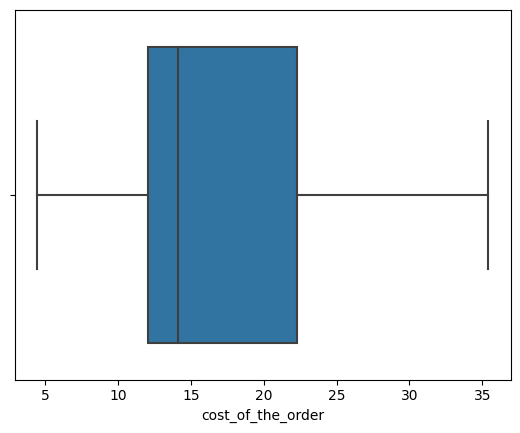

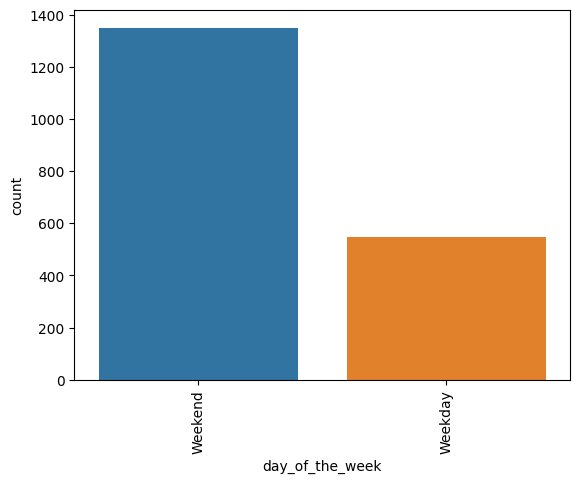

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


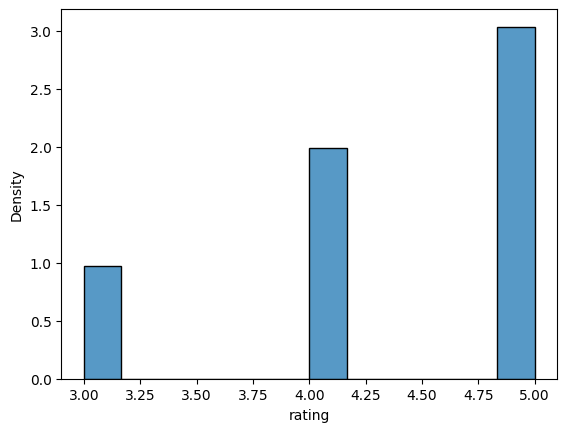

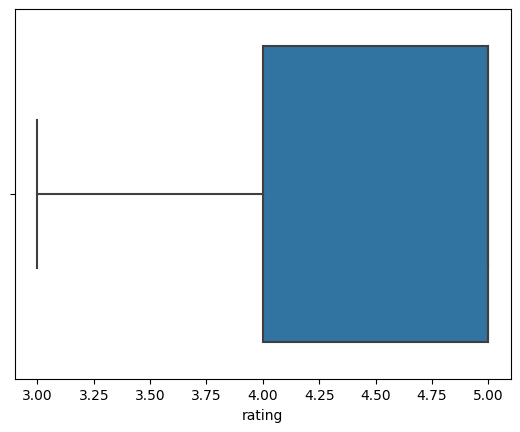

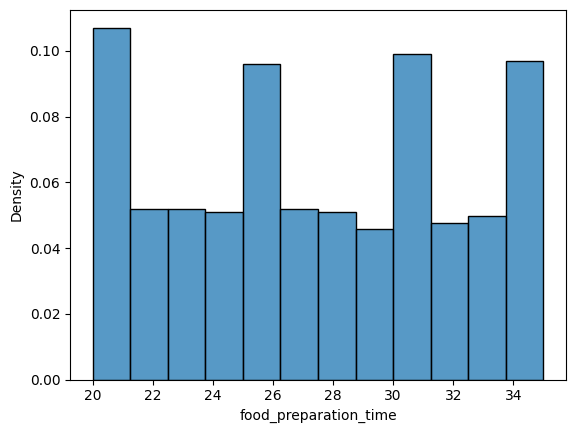

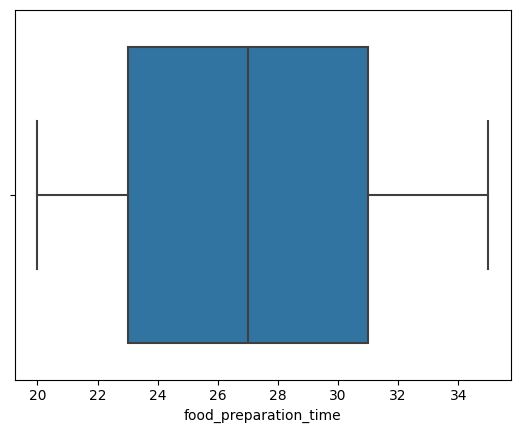

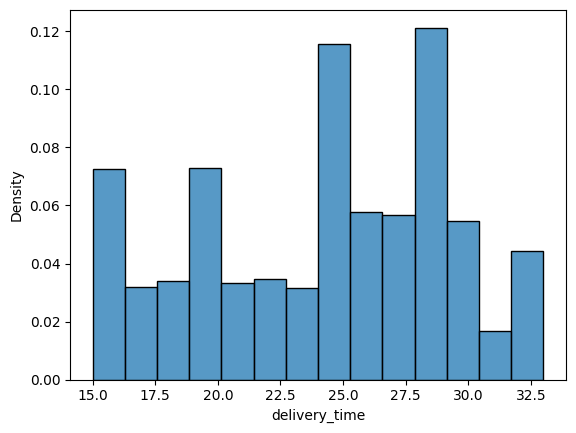

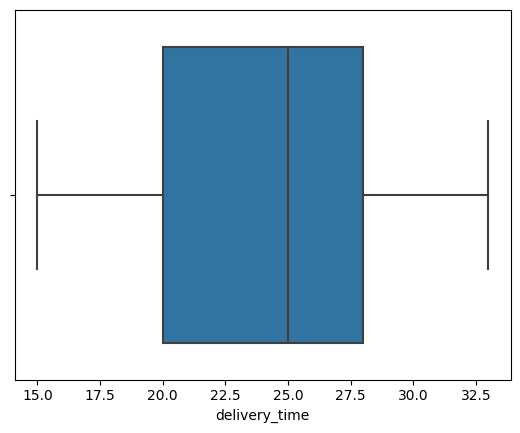

In [ ]:
# convert Customer ID to a string
df['customer_id'] = df['customer_id'].astype(str)
# Analyze Customer ID
sns.countplot(data=df,x='customer_id')
plt.xticks(rotation=90)
plt.show()

# Analyze the number of orders per restaurant
sns.countplot(data=df,x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

# Analyze the number of orders per cuisine type
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

# Analyze Cost of orders
sns.histplot(data=df,x='cost_of_the_order', stat='density')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

# Analyze the number of orders per day of the week
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

# Analyze Rating
sns.histplot(data=df,x='rating', stat='density')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

# Analyze food preparation time
sns.histplot(data=df,x='food_preparation_time', stat='density')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

# Analyze delivery time
sns.histplot(data=df,x='delivery_time', stat='density')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

In [ ]:
#### Observations

#### Customer ID: There is an outliers: a customer with more than 12 orders and a customer with 8 orders and 3 customers with 6 orders. Most customers have 2 or less orders

#### Restaurant Name: There is an outlier with a restaurant with more than 200 orders, 2 restaurants with more than 100 orders. Most restaurants have 25 or less orders

#### Cuisine: American has the most orders (>500), Japanese has the second most orders (>400), Italian and Chinese have more than 200 orders. The other cuisines have less than 100 orders

#### Cost: The greatest density of cost is highest at 11.25. The median is almost at 15. The data is skewed to the right.

#### Day of the Week: Weekend orders are more than double weekday orders. This is further skewed in that there are just 2 weekend days and 5 weekday days. Normalized for number of days, weekend days have about 700 orders per day while weekdays have about 100 orders per day

#### Rating: Data is skewed to the right towards a rating of 5; there are no ratings lower than 2

#### Food Preparation: Data has a multimodal distribution, with peaks at approx 20, 25, 30, and 35 mins; the average food prep time is approx 27 mins

#### Delivery Time: Data has a multimodal distribution, with peaks at approx 25, 29mins; the average food prep time is approx 25 mins

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# top 5 restaurants in terms of number of orders received
#install plotly
!pip install plotly
#import plotly
import plotly.express as px
his = px.histogram(df, x="restaurant_name")
his.show()

#### Observations: The restaurants with the 5 greatest number of orders are "Shake Shack", "The Meatball Shop", "Five Guys Burgers and Fries", "Dirty Bird to Go", "Parm"


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# identify the most popular cuisine on weekends
df.groupby(['day_of_the_week', 'cuisine_type'])['order_id'].count()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

#### Observations:
The most popular cuisine on the weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# get number of the orders that cost more than $20
ordermore20=df.loc[df['cost_of_the_order']>20].value_counts()
ordermore20.shape[0]
print(ordermore20.shape[0])

# get number of total orders
print(df.shape[0])

# get percentage of orders greater than 20
print ("percentage of orders >$20 is")
print ((ordermore20.shape[0])/(df.shape[0])*100)

356
1898
percentage of orders >$20 is
18.75658587987355


#### Observations: there are 356 orders that are >$20; there are 1898 total orders. The percentage of orders >20 is 18.75%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean order delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations: the mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# find top 3 most frequent customers
his = px.histogram(df, x="customer_id")
his.show()

#### Observations: the 3 customer id's with the most orders are 52832, 47440, 83287. Customer 52832 placed 13 orders. Customer 47440 placed 10 orders. Customer 83287 placed 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-16-5d2f0ae45baa>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



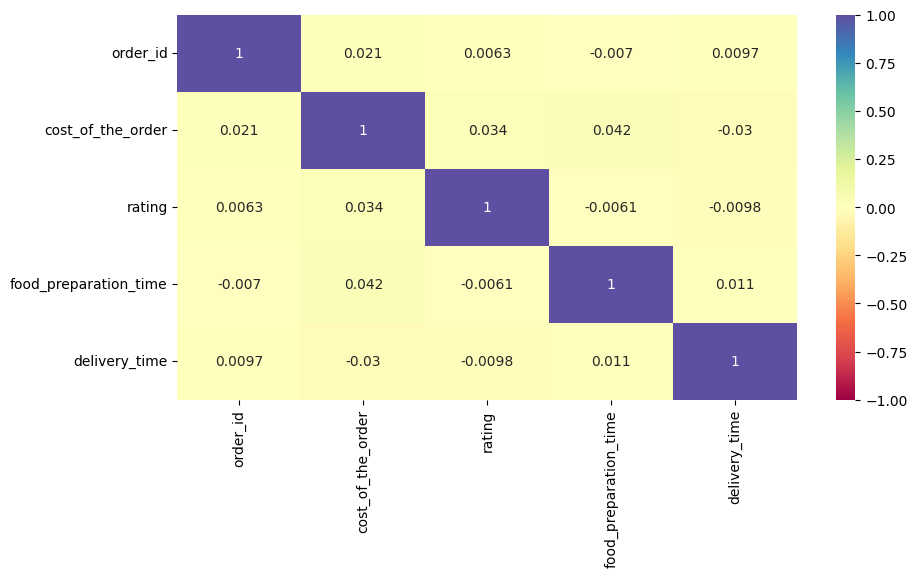

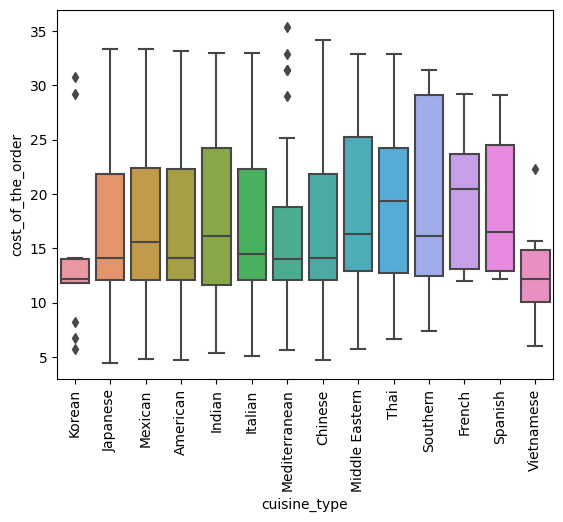

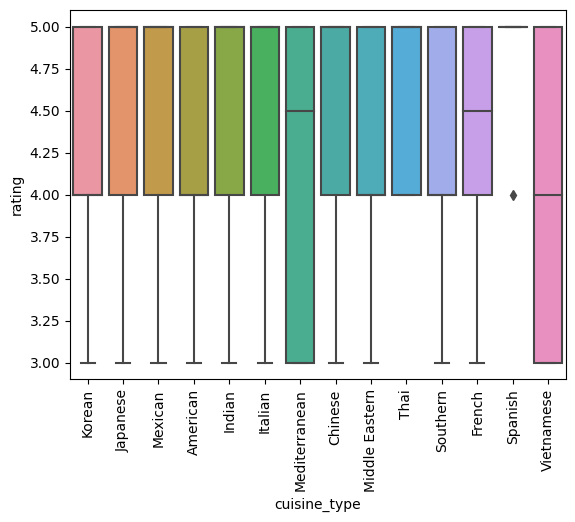

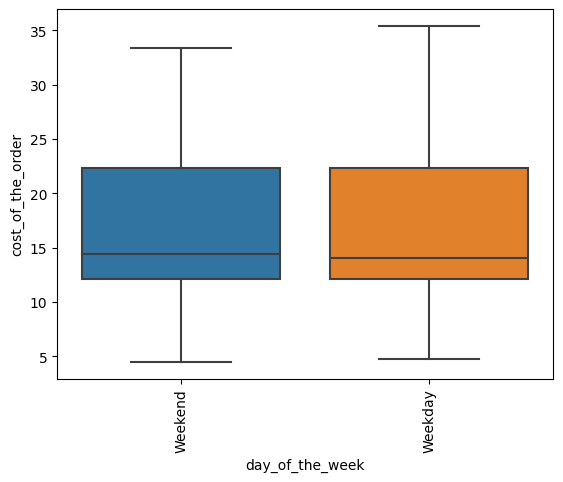

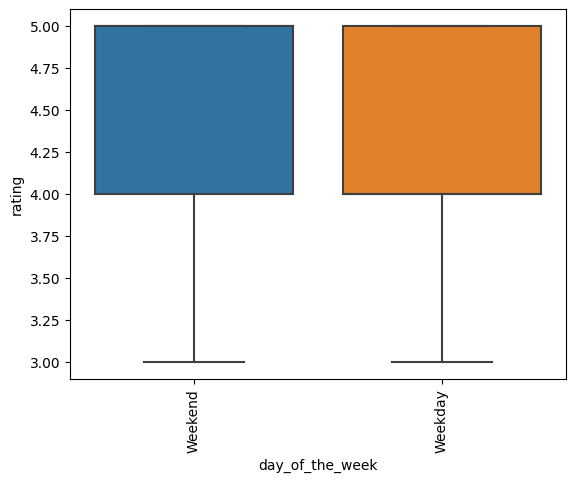

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



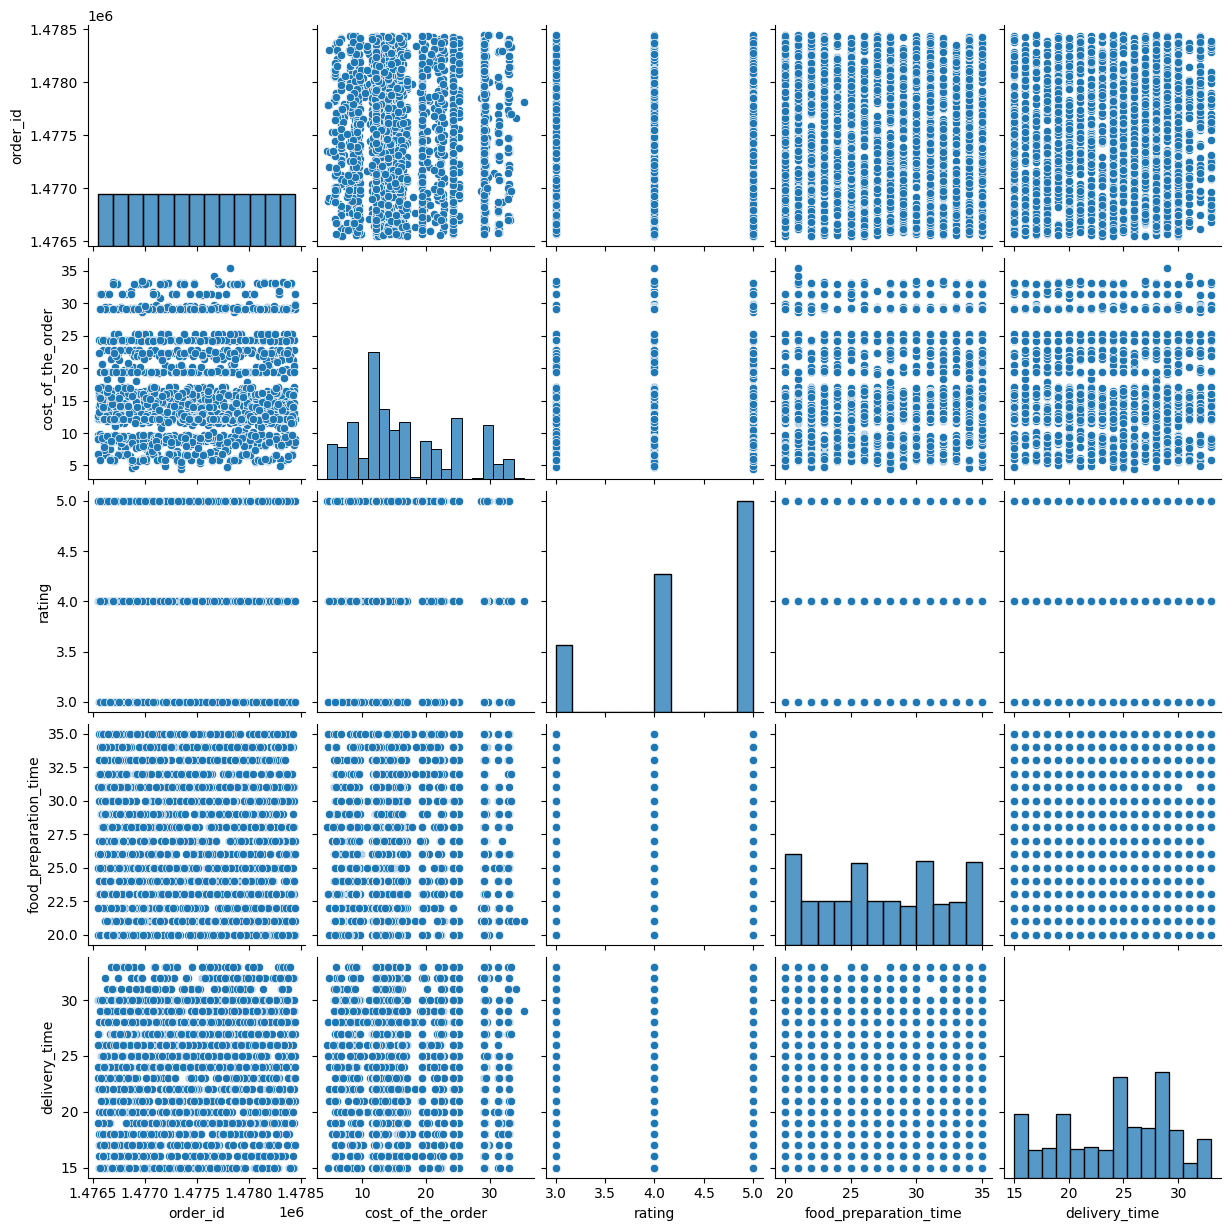

In [ ]:
#check for correlation among numerical variables
num_var=['order_id','cost_of_the_order','rating','food_preparation_time','delivery_time']
corr=df[num_var].corr()
#plot the heatmap
ç
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df,x='cuisine_type',y='rating')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='rating')
plt.xticks(rotation=90)
plt.show()
# explore relationships between dataset variables

sns.pairplot(data=df)
plt.show()

In [ ]:
#### Observations: there is a low degree of correlation between the numerical variables of order id, customer id, rating, delivery time, and food preparation time; vietnamese and korean had relatively low prices; mediterranean and vietnamese had relatively low ratings

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# create dataframe with restaurant names and rating counts
restnamerate = df.groupby(['restaurant_name'])['rating'].count()
print(restnamerate)

# get restaurant names that have rating count >50
restrt50=(restnamerate[restnamerate>50])
print(restrt50)


# find mean rating of the restaurants
restrtmean = df.groupby(['restaurant_name'])['rating'].mean()
print(restrtmean)

# use inner merge of dataframes
pd.merge(restrt50,restrtmean,how='inner',on='restaurant_name')

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating, Length: 178, dtype: int64
restaurant_name
Blue Ribbon Fried Chicken     64
Blue Ribbon Sushi             73
Shake Shack                  133
The Meatball Shop             84
Name: rating, dtype: int64
restaurant_name
'wichcraft               5.0
12 Chairs                4.5
5 Napkin Burger          4.0
67 Burger                5.0
Alidoro                 <NA>
                      ...   
Zero Otto Nove           4.0
brgr                     3.0
da Umberto               5.0
ilili Restaurant    4.153846
indikitch                4.5
Name: rating, Length: 178, dtype: Float64


,rating_x,rating_y
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations: there are just 4 restaurants with a high volume of ratings and a high ratings score


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# create function with conditional statements for category and revenue for conditions

total = 0
for x in df['cost_of_the_order']:
  if(x)>20:
    total = total + x*.25
  elif(x)>5:
    total = total + x*.15

# take summation of the revenue column
print(total)


6166.302999999994


#### Observations: net revenue is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# create column for total time to get food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

# get number of orders with total time >60 mins
tt60=df.loc[df['total_time']>60].value_counts()
print(tt60)
tt60.shape[0]
print(tt60.shape[0])

# get number of total orders
print(df.shape[0])

# get percentage of orders with more than 60 mins of total time to get food
print(tt60.shape[0]/(df.shape[0])*100)


order_id  customer_id  restaurant_name                cuisine_type  cost_of_the_order  day_of_the_week  rating  food_preparation_time  delivery_time  total_time
1476565   41991        Blue Ribbon Sushi Bar & Grill  Japanese      15.33              Weekend          5       32                     29             61            1
1477826   381020       RedFarm Broadway               Chinese       8.20               Weekend          4       31                     30             61            1
1477917   71249        Momoya                         Japanese      24.30              Weekend          4       35                     30             65            1
1477912   261400       The Meatball Shop              Italian       19.45              Weekday          5       31                     32             63            1
1477900   276192       Sushi of Gari Tribeca          Japanese      8.63               Weekend          5       33                     28             61            1
         

#### Observations: 119 out of 1898 orders have a total time greater than 60 minutes, or 6.27%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

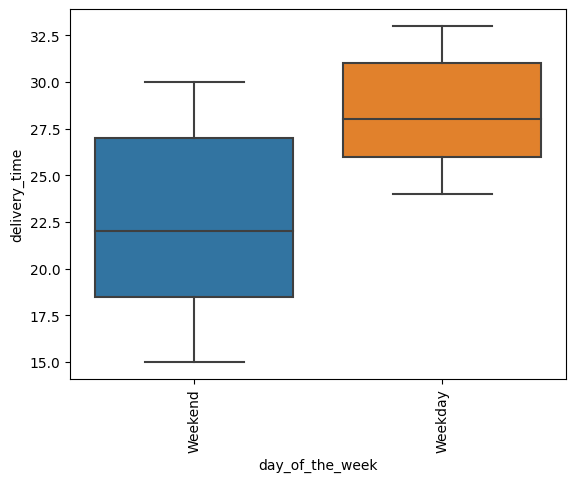

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


<ipython-input-21-ce352a2e1676>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# get the difference between the mean delivery time of weekdays vs weekends
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.xticks(rotation=90)
plt.show()
dfweekmean=df.groupby('day_of_the_week').mean()['delivery_time']
print(dfweekmean)


#### Observations:
delivery times over the weekend are approx 6 mins lower



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* customers have a high preference for specific cuisines, especially American food
* customers have a high preference for price range, especially between $11-15
* customers have a high preference for delivering food over the weekend, which also have low delivery times
* delivery times are higher for a lower number of orders over the weekdays
* there is a relatively low number (4) restaurants with high ratings scores and high volume of ratings
* most customers have a low number of orders
* almost 40% of the orders did not have ratings


### Recommendations:

* Enable customers to search by cuisine type, and order the cuisine types so that American cuisine is prominently displayed. This could be done by either alphabetical ordering or by highest number of orders
* Enable customers to search by price range, and create a range between $11-15 as a selectable option
* Spend more advertising during weekends to take greater advantage of the natural demand
* Increase delivery drivers during the week to lower delivery times so that customers will get a better experience and perhaps order more next time
* Enable virtual badges for restaurants with high rating scores and high volume of ratings. This may help increase demand and awareness of the product line's strongest offerings
* Enable a loyalty program that will incentivize customers to order more often. For example, create a promotional discount for customers when they place their 3rd and 5th orders
* Send follow-up emails to customers to provide ratings for orders to increase engagement on the site and improve the strength of the ratings info for the overall user base

---